##### Assignment 5

Due: **10:00 08. July 2025**

Discussion: **12:00 08. July 2025**

**Online submission** at via github classroom  

In [1]:
%matplotlib inline

# 1. Regression - Fitting a line [data exercise] **[25 Points]**

In this problem we will fit a linear function $f(x) = y_0 + \beta_0 x$ to the data from datafile: `Data/line_data.dat`.

**a)** Perform the linear regression to fit a linear function $f(x) = y_0 + \beta_0 x$ and plot $f(x)$ together with the data points. **15 Points**

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


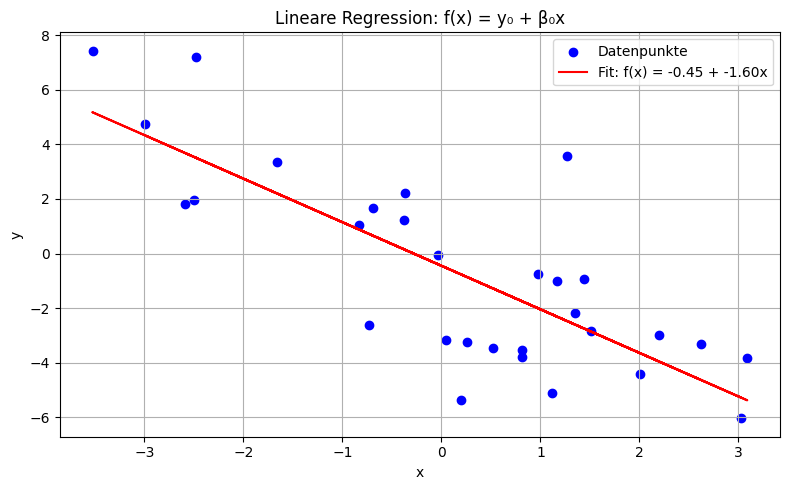

In [ ]:
#Die Aufgaben wurden mit Hilfe von ChatGPT und CoPilot gelöst.

%pip install matplot numpy
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('Data/line_data.dat')
x = data[:, 0]
y = data[:, 1]

beta_0, y_0 = np.polyfit(x, y, 1)

fitted_y = y_0 + beta_0 * x

plt.figure(figsize=(8, 5))
plt.scatter(x, y, label='Datenpunkte', color='blue')
plt.plot(x, fitted_y, label=f'Fit: f(x) = {y_0:.2f} + {beta_0:.2f}x', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Lineare Regression: f(x) = y₀ + β₀x')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**b)** Compute the residuals and plot them. What is $R^2$? **10 Points**

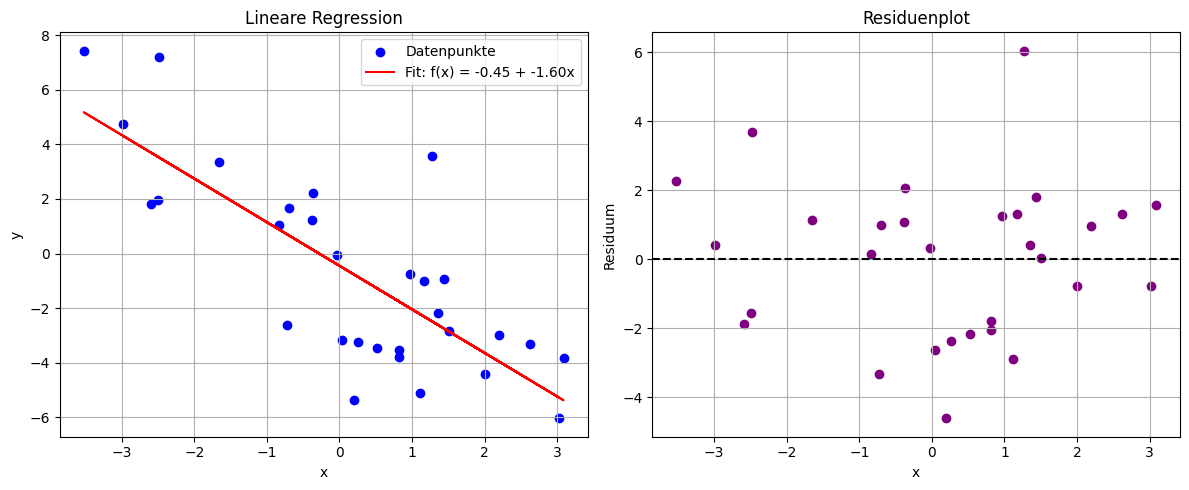

R² = 0.6124


In [2]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('Data/line_data.dat')
x = data[:, 0]
y = data[:, 1]

beta_0, y_0 = np.polyfit(x, y, 1)

y_pred = y_0 + beta_0 * x

residuals = y - y_pred

ss_res = np.sum(residuals**2)
ss_tot = np.sum((y - np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(x, y, label='Datenpunkte', color='blue')
plt.plot(x, y_pred, label=f'Fit: f(x) = {y_0:.2f} + {beta_0:.2f}x', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Lineare Regression')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(x, residuals, color='purple')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('x')
plt.ylabel('Residuum')
plt.title('Residuenplot')
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"R² = {r_squared:.4f}")


# 2. Regression - Fitting a paraboloid [data exercise] **[25 Points]**

In this problem we will fit a linear function $f(x, y) = \beta_0 + \beta_1 x + \beta_2 y + \beta_3 x^2 + \beta_4 y^2$ to the data from datafile: `Data/paraboloid_data.dat`.

*Note: although $f(x, y)$ is technically quadratic in $x$ and $y$, it is still linear in terms of the fitting parameters $\beta_i$*

**a)** Perform the linear regression to fit a linear function $f(x, y) = \beta_0 + \beta_1 x + \beta_2 y + \beta_3 x^2 + \beta_4 y^2$ and plot
$f(x)$ together with the data points. **15 Points**

Gefundene Koeffizienten:
β0 = 33.5337, β1 = -3.8738, β2 = -3.8316, β3 = 0.9898, β4 = 1.0031


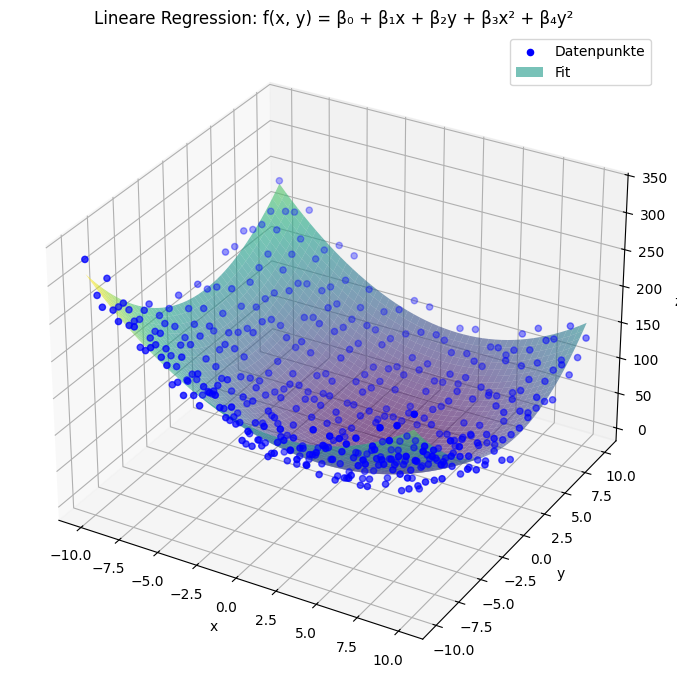

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data = np.loadtxt('Data/paraboloid_data.dat')
x = data[:, 0]
y = data[:, 1]
z = data[:, 2]

X = np.column_stack((np.ones_like(x), x, y, x**2, y**2))

beta, *_ = np.linalg.lstsq(X, z, rcond=None)

β0, β1, β2, β3, β4 = beta
print(f"Gefundene Koeffizienten:\nβ0 = {β0:.4f}, β1 = {β1:.4f}, β2 = {β2:.4f}, β3 = {β3:.4f}, β4 = {β4:.4f}")

grid_x, grid_y = np.meshgrid(np.linspace(min(x), max(x), 50),
                             np.linspace(min(y), max(y), 50))
grid_z = β0 + β1 * grid_x + β2 * grid_y + β3 * grid_x**2 + β4 * grid_y**2

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, color='blue', label='Datenpunkte')

ax.plot_surface(grid_x, grid_y, grid_z, alpha=0.6, cmap='viridis', label='Fit')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Lineare Regression: f(x, y) = β₀ + β₁x + β₂y + β₃x² + β₄y²')
plt.legend()
plt.tight_layout()
plt.show()


**b)** Plot the residuals and compute  $R^2$. **10 Points**

R² = 0.9416


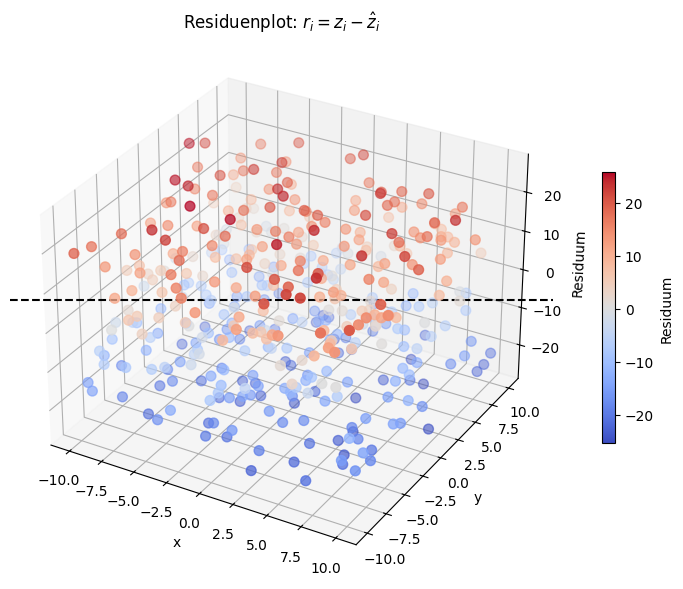

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data = np.loadtxt('Data/paraboloid_data.dat')
x = data[:, 0]
y = data[:, 1]
z = data[:, 2]

X = np.column_stack((np.ones_like(x), x, y, x**2, y**2))

beta, *_ = np.linalg.lstsq(X, z, rcond=None)
z_pred = X @ beta

residuals = z - z_pred

ss_res = np.sum(residuals**2)
ss_tot = np.sum((z - np.mean(z))**2)
r_squared = 1 - ss_res / ss_tot

print(f"R² = {r_squared:.4f}")

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x, y, residuals, c=residuals, cmap='coolwarm', s=50)
ax.axhline(0, color='black', linestyle='--')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Residuum')
ax.set_title('Residuenplot: $r_i = z_i - \hat{z}_i$')
fig.colorbar(sc, shrink=0.5, label='Residuum')
plt.tight_layout()
plt.show()



# 3. Model fit quality assessment **[10 Points]**

In this problem you will assess the quality of a fit by inspecting the residuals of the fit. For each of the
following plots state whether the residuals indicate a reasonable model fit and briefly explain your
conclusion and if applicable how possibly to improve the fit. **10 Points**

![test](images/residuals.jpg)

a) Die Residuen sind zufllig um die Nulllinie gestreut. Es handelt sich hierbei um ein passendes Modell.

b) Auch hier wirken die Residuen so, als wären sie zufällig um Null gestreeut. Dies spricht für eine gute Modellanpassung.

c) In diesem Fall weisen die Residuen einen linearen Trend auf. Hier handelt es sich also um ein unpassendes Modell.
Um das Modell an die Datenpunkte anzupassen, müsste das Modell mit einem lineare Term erweitert werden.

d) Die Punkte weisen zwar eine große Streuung, aber kein bestimmtes Muster auf. Es handelt sich also um ein passendes Modell.

e) Hier weisen die Residuen ein wellenförmiges Muster auf. Offensichtlich handelt es sich um ein unpassendes Modell, das den nichtlinearen Zusammenhang nicht erfasst.
Das Modell müsste durch sinusartige Funktionen oder höhere Polynome erweitert werden.

# 4. Vibrations on a string **[40 Points]**

Consider a simplified 1-D example of standing waves on a vibrating string. The string is $1m$ in length, and the measured displacement is given in `string.dat`. We will want to analyse the amplitudes of the fundamental (dominant) mode and the overtones, which can be done by performing linear regression on the residuals.

**a)** Perform a linear regression to find the amplitude of the dominant mode. Plot the fit along with the measurements provided. What is $R^2$? **10 points**

 > *Hint:* Use the equation for an oscillating string, $f(x) = \sum_{n=1}^N \beta_n \mathrm{sin}(\frac{n\pi}{L} x)$, for $(N-1)$ overtones on the fundamental mode.

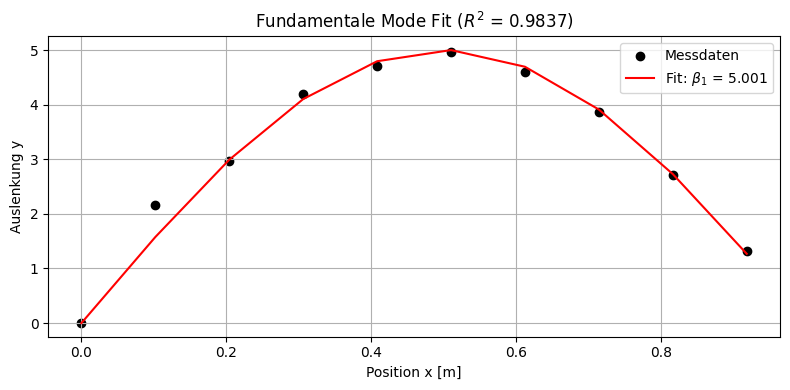

Amplitude (beta_1): 5.0014
R^2: 0.9837


In [10]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('Data/string.dat', delimiter=',')

x = data[:, 0]
y = data[:, 1]

L= 1

phi1 = np.sin(np.pi * x / L)

numerator = np.dot(phi1, y)
denominator = np.dot(phi1, phi1)
beta_1 = numerator / denominator

y_pred = beta_1 * phi1

ss_res = np.sum((y - y_pred) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r2 = 1 - ss_res / ss_tot

plt.figure(figsize=(8, 4))
plt.scatter(x, y, color='black', label='Messdaten')
plt.plot(x, y_pred, color='red', label=f'Fit: $\\beta_1$ = {beta_1:.3f}')
plt.title(f'Fundamentale Mode Fit ($R^2$ = {r2:.4f})')
plt.xlabel('Position x [m]')
plt.ylabel('Auslenkung y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Amplitude (beta_1): {beta_1:.4f}")
print(f"R^2: {r2:.4f}")


**b)** Successively repeat **a)** by successively including the next five overtones in your model. Summarise the results and the corresponding $R^2$ in a table. **15 points**

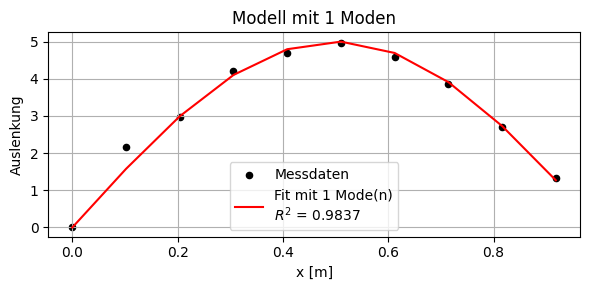

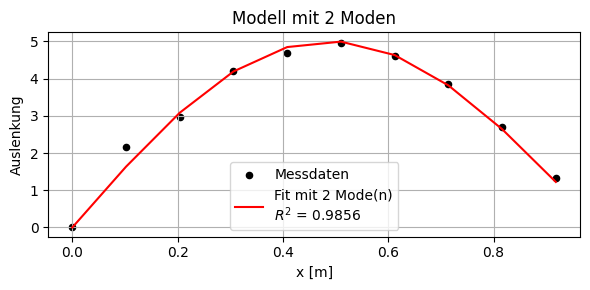

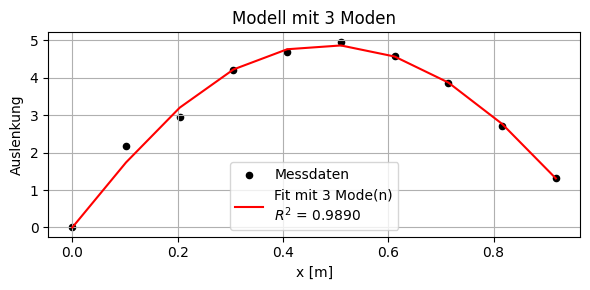

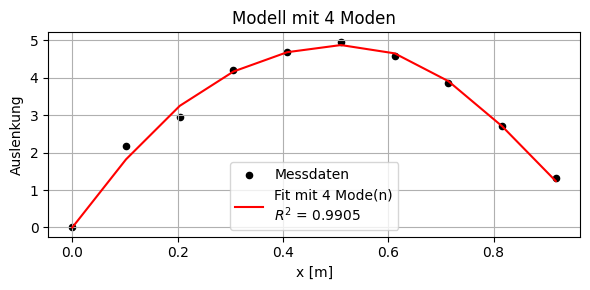

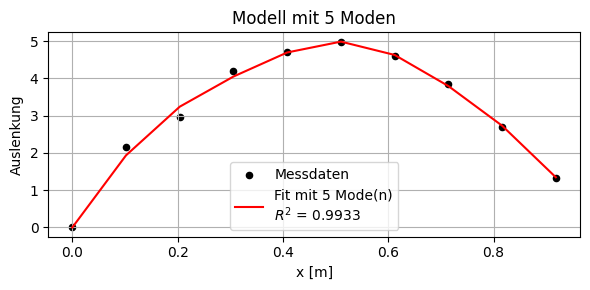

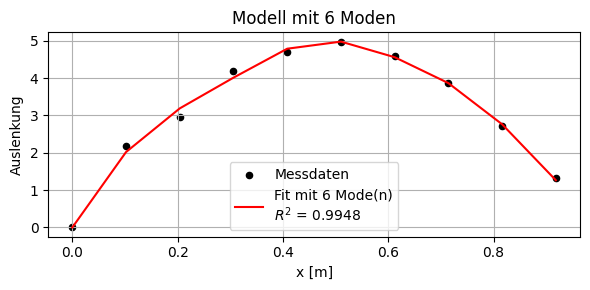

Zusammenfassung:
 N        R²    Koeffizienten β
----------------------------------------
 1    0.9837    5.0014
 2    0.9856    5.0015, 0.0953
 3    0.9890    5.0014, 0.0956, 0.1284
 4    0.9905    5.0015, 0.0953, 0.1288, 0.0858
 5    0.9933    5.0013, 0.0958, 0.1281, 0.0867, 0.1156
 6    0.9948    5.0015, 0.0953, 0.1287, 0.0858, 0.1168, 0.0861


In [9]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("Data/string.dat", delimiter=',')
x = data[:, 0]
y = data[:, 1]

L = 1
max_N = 6

results = []

for N in range(1, max_N + 1):
    X = np.column_stack([np.sin(n * np.pi * x / L) for n in range(1, N + 1)])

    XT_X = X.T @ X
    XT_y = X.T @ y
    beta = np.linalg.solve(XT_X, XT_y)

    y_pred = X @ beta

    ss_res = np.sum((y - y_pred) ** 2)
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    r2 = 1 - ss_res / ss_tot

    results.append((N, r2, beta))

    plt.figure(figsize=(6, 3))
    plt.scatter(x, y, label='Messdaten', color='black', s=20)
    plt.plot(x, y_pred, label=f'Fit mit {N} Mode(n)\n$R^2$ = {r2:.4f}', color='red')
    plt.title(f'Modell mit {N} Moden')
    plt.xlabel('x [m]')
    plt.ylabel('Auslenkung')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

print("Zusammenfassung:")
print(f"{'N':>2}  {'R²':>8}    Koeffizienten β")
print("-" * 40)
for N, r2, beta in results:
    coeffs_str = ", ".join([f"{b:.4f}" for b in beta])
    print(f"{N:>2}  {r2:8.4f}    {coeffs_str}")


**c)** Can you calculate more overtones? If so, how many and what are they? Are there any benefits or issues in calculating more overtones? Which is the model of best-fit? **15 points**

Es können weitere Obertöne berechnet werden, solange genügend Datenpunkte vorhanden sind.
Dabei muss gelten: N << Anzahl der Messwerte

Der Vorteil von der Berechnung weiterer Obertöne ist eine höhere Genauigkeit des Fits, da sich das Modell mit mehr Freiheitsgraden besser anpassen kann.
Allerdings kann es auch passieren, dass sich das Modell -bei zu vielen Moden- eher dem Rauschen anpasst, als der tatsächlichen Struktur.